In [1]:
#!pip install opencv-python

## Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Read Image

In [2]:
img = cv2.imread('.\\test images\\20190809_161151.jpg')
img.shape

(256, 256, 3)

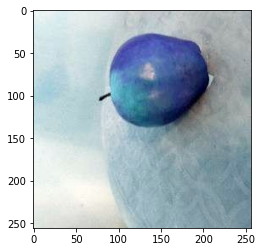

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(256, 256)

In [5]:
gray

array([[247, 243, 239, ..., 174, 178, 180],
       [247, 244, 240, ..., 176, 175, 174],
       [248, 245, 242, ..., 178, 172, 168],
       ...,
       [234, 234, 233, ..., 133, 138, 141],
       [232, 232, 231, ..., 137, 138, 138],
       [230, 230, 229, ..., 141, 137, 133]], dtype=uint8)

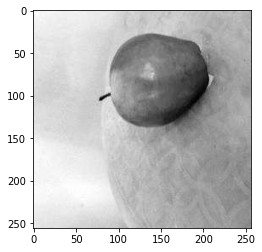

In [6]:
plt.imshow(gray,cmap='gray')

# Preprocessing

## Data Cleaning

In [7]:
config_file = "./opencv/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "./opencv/frozen_inference_graph.pb"


In [8]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [9]:
model.setInputSize(256,256)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000027965BF6DF0>

In [10]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[53]


In [12]:
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    x, y, w, h = boxes
    cropimg2=cv2.rectangle(img,boxes,(255,0,0),2)

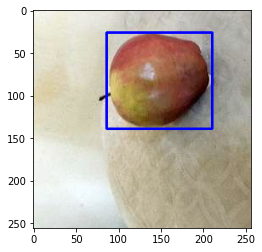

In [13]:
plt.imshow(cv2.cvtColor(cropimg2,cv2.COLOR_BGR2RGB))

In [14]:
crop_img = img[y:y + h, x:x + w]

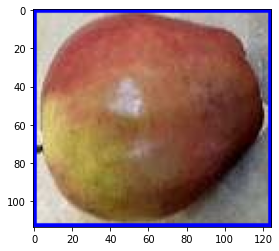

In [15]:
plt.imshow(cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB))

### Function to get crop image

In [16]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
    
    if len(ClassIndex) > 0:
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            x, y, w, h = boxes
            cropimg2=cv2.rectangle(img,boxes,(255,0,0),2)
            crop_img = img[y:y + h, x:x + w]
            return crop_img

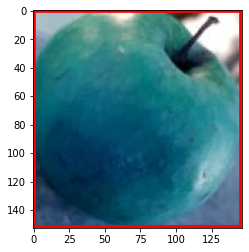

In [17]:
crop_image=get_cropped_image('.\\test images\\Apple_Good2.png')
plt.imshow(crop_image)

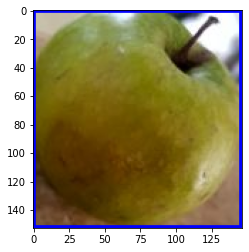

In [18]:
plt.imshow(cv2.cvtColor(crop_image,cv2.COLOR_BGR2RGB))

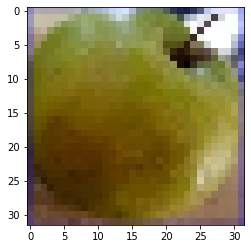

In [19]:
kk=(cv2.resize(crop_image, (32, 32)))
plt.imshow(cv2.cvtColor(kk,cv2.COLOR_BGR2RGB))

### Store crop images into new folder

In [20]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./dataset/Apple_Bad', './dataset/Apple_Good']

In [22]:
# If folder exists then remove it
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

Apple_Bad
Generating cropped images in folder:  ./dataset/cropped/Apple_Bad
Apple_Good
Generating cropped images in folder:  ./dataset/cropped/Apple_Good


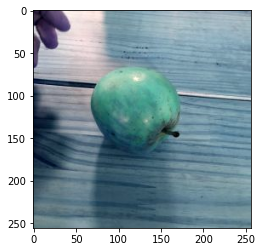

In [23]:
cropped_image_dirs = []
apple_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    apple_type = img_dir.split('/')[-1]
    print(apple_type)
    
    apple_file_names_dict[apple_type] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + apple_type
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = apple_type + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            apple_file_names_dict[apple_type].append(cropped_file_path)
            count += 1

## Extract Features from Image

### Use wavelet transform as a feature for traning our model

In [15]:
# from stack overflow
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

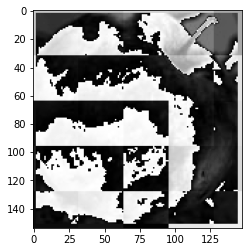

In [16]:
im_har = w2d(crop_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
apple_file_names_dict

{'Apple_Bad': ['./dataset/cropped/Apple_Bad/Apple_Bad1.png',
  './dataset/cropped/Apple_Bad/Apple_Bad2.png',
  './dataset/cropped/Apple_Bad/Apple_Bad3.png',
  './dataset/cropped/Apple_Bad/Apple_Bad4.png',
  './dataset/cropped/Apple_Bad/Apple_Bad5.png',
  './dataset/cropped/Apple_Bad/Apple_Bad6.png',
  './dataset/cropped/Apple_Bad/Apple_Bad7.png',
  './dataset/cropped/Apple_Bad/Apple_Bad8.png',
  './dataset/cropped/Apple_Bad/Apple_Bad9.png',
  './dataset/cropped/Apple_Bad/Apple_Bad10.png',
  './dataset/cropped/Apple_Bad/Apple_Bad11.png',
  './dataset/cropped/Apple_Bad/Apple_Bad12.png',
  './dataset/cropped/Apple_Bad/Apple_Bad13.png',
  './dataset/cropped/Apple_Bad/Apple_Bad14.png',
  './dataset/cropped/Apple_Bad/Apple_Bad15.png',
  './dataset/cropped/Apple_Bad/Apple_Bad16.png',
  './dataset/cropped/Apple_Bad/Apple_Bad17.png',
  './dataset/cropped/Apple_Bad/Apple_Bad18.png',
  './dataset/cropped/Apple_Bad/Apple_Bad19.png',
  './dataset/cropped/Apple_Bad/Apple_Bad20.png',
  './dataset/cro

## Prepare X and Y variable

In [27]:
class_dict = {}
count = 0
for apple_type in apple_file_names_dict.keys():
    class_dict[apple_type] = count
    count = count + 1
class_dict

{'Apple_Bad': 0, 'Apple_Good': 1}

In [28]:
X = []
y = []

for apple_type, training_files in apple_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[apple_type])  

In [29]:
len(X[0])

4096

In [30]:
X[0]

array([[248],
       [ 25],
       [ 25],
       ...,
       [155],
       [154],
       [204]], dtype=uint8)

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(2137, 4096)

In [32]:
X[0]

array([248.,  25.,  25., ..., 155., 154., 204.])

In [33]:
y[0]

0

## Model Training

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
len(X_test)

535

## Hyperparameter Tunning Using Grid Search CV

### SVM, random forest, logistic regression

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.982519,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.945691,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.955060,{'logisticregression__C': 10}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)

0.9925233644859813

In [41]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9514018691588785

In [42]:
best_estimators['random_forest'].score(X_test,y_test)

0.9532710280373832

### Support Vector Machine

In [43]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10, gamma='auto',probability=True))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9925233644859813

In [44]:
svm_ypred = pipe.predict(X_test)

In [45]:
svm_accuracy = metrics.accuracy_score(y_test, svm_ypred)
svm_f1_score = metrics.f1_score(y_test, svm_ypred)
svm_jaccard_score = metrics.jaccard_score(y_test, svm_ypred)

print("Accuracy of SVM: ",svm_accuracy)
print("F1 score of SVM: ",svm_f1_score)
print("Jaccard Score of SVM: ",svm_jaccard_score)

Accuracy of SVM:  0.9925233644859813
F1 score of SVM:  0.991701244813278
Jaccard Score of SVM:  0.9835390946502057


In [46]:
print(classification_report(y_test, svm_ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       295
           1       0.99      1.00      0.99       240

    accuracy                           0.99       535
   macro avg       0.99      0.99      0.99       535
weighted avg       0.99      0.99      0.99       535



### Random Forest Classifier

In [47]:
pipe_rf = Pipeline([('scaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(X_train, y_train)
pipe_rf.score(X_test, y_test)

0.9644859813084112

In [48]:
rf_ypred = pipe.predict(X_test)

In [49]:
rf_accuracy = metrics.accuracy_score(y_test, rf_ypred)
rf_f1_score = metrics.f1_score(y_test, rf_ypred)
rf_jaccard_score = metrics.jaccard_score(y_test, rf_ypred)

print("Accuracy of Random Forest: ",rf_accuracy)
print("F1 score of Random Forest: ",rf_f1_score)
print("Jaccard Score of Random Forest: ",rf_jaccard_score)

Accuracy of Random Forest:  0.9925233644859813
F1 score of Random Forest:  0.991701244813278
Jaccard Score of Random Forest:  0.9835390946502057


### Logistic Regression

In [50]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', LogisticRegression(C=10, solver='liblinear'))])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)

0.9514018691588785

In [51]:
lr_ypred = pipe.predict(X_test)

In [52]:
lr_accuracy = metrics.accuracy_score(y_test, lr_ypred)
lr_f1_score = metrics.f1_score(y_test, lr_ypred, average='weighted')
lr_jaccard_score = metrics.jaccard_score(y_test, lr_ypred, pos_label=0)

print("Accuracy of Logistic Regression: ",lr_accuracy)
print("F1 score of Logistic Regression: ",lr_f1_score)
print("Jaccard Score of Logistic Regression: ",lr_jaccard_score)

Accuracy of Logistic Regression:  0.9925233644859813
F1 score of Logistic Regression:  0.9925261608113987
Jaccard Score of Logistic Regression:  0.9864864864864865


## Comparitive Score

In [53]:
result = pd.DataFrame({
    'Model': ['SVM','Logistic Regression','Random Forest'],
    'Jaccard Score':[svm_jaccard_score,lr_jaccard_score,rf_jaccard_score],
    'F1 Score': [svm_f1_score,lr_f1_score,rf_f1_score],
    'Accuracy': [svm_accuracy,lr_accuracy,rf_accuracy]
})
result

,Model,Jaccard Score,F1 Score,Accuracy
0,SVM,0.983539,0.991701,0.992523
1,Logistic Regression,0.986486,0.992526,0.992523
2,Random Forest,0.983539,0.991701,0.992523


## K fold cross validation

In [54]:
from sklearn import model_selection
seed=7
models=[]
models.append(('SVM',pipe))
models.append(('Logistic Regression',pipe_lr))
models.append(('Random Forest',pipe_rf))
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)

In [55]:
for i in range(len(names)):
    cv_result_arr=np.array(results[i])
    print(names[i],":",np.mean(cv_result_arr))

SVM : 0.9850194099378884
Logistic Regression : 0.9575543478260868
Random Forest : 0.9481987577639751


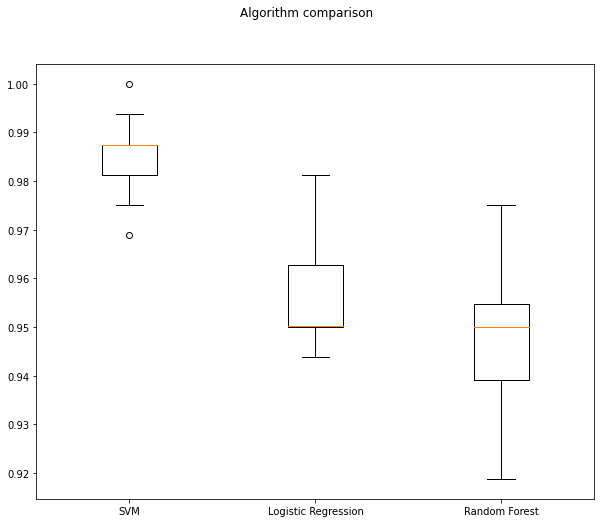

In [56]:
# fig = plt.figure()
fig=plt.figure(figsize=(10,8))

fig.suptitle('Algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Plotting ROC_AUC Curve

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [pipe,pipe_lr,pipe_rf]
model=['SVM','Logistic Regression','Random Forest']
result_table = pd.DataFrame(columns=['model','fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train,y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr,tpr, _=roc_curve(y_test,yproba)
    auc = roc_auc_score(y_test,yproba)
    result_table = result_table.append({
        'model':cls.__class__.__name__,
        'fpr':fpr,
        'tpr':tpr,
        'auc':auc
    },ignore_index=True)
result_table.set_index('model',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33664\3710261910.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_33664\3710261910.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_33664\3710261910.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({


In [58]:
print(result_table)

                                                        fpr  \
model                                                         
Pipeline  [0.0, 0.0, 0.0, 0.003389830508474576, 0.003389...   
Pipeline  [0.0, 0.0, 0.0, 0.003389830508474576, 0.003389...   
Pipeline  [0.0, 0.0, 0.003389830508474576, 0.01016949152...   

                                                        tpr       auc  
model                                                                  
Pipeline  [0.0, 0.004166666666666667, 0.9625, 0.9625, 0....  0.999633  
Pipeline  [0.0, 0.004166666666666667, 0.4125, 0.4125, 0....  0.989251  
Pipeline  [0.0, 0.38333333333333336, 0.65, 0.7875, 0.883...  0.992338  


## Plot The Figure

In [59]:
classifiers = [pipe, pipe_lr, pipe_rf]
model_names = ['SVM', 'Logistic Regression', 'Random Forest']
result_table = pd.DataFrame(columns=['model', 'fpr', 'tpr', 'auc'])

for cls, name in zip(classifiers, model_names):
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({
        'model': name,
        'fpr': fpr,
        'tpr': tpr,
        'auc': auc
    }, ignore_index=True)

result_table.set_index('model', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33664\39299875.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_33664\39299875.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({
C:\Users\Admin\AppData\Local\Temp\ipykernel_33664\39299875.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({


In [60]:
print(result_table)

                                                                   fpr  \
model                                                                    
SVM                  [0.0, 0.0, 0.0, 0.003389830508474576, 0.003389...   
Logistic Regression  [0.0, 0.0, 0.0, 0.003389830508474576, 0.003389...   
Random Forest        [0.0, 0.0, 0.003389830508474576, 0.01694915254...   

                                                                   tpr  \
model                                                                    
SVM                  [0.0, 0.004166666666666667, 0.9625, 0.9625, 0....   
Logistic Regression  [0.0, 0.004166666666666667, 0.4125, 0.4125, 0....   
Random Forest        [0.0, 0.4041666666666667, 0.6791666666666667, ...   

                          auc  
model                          
SVM                  0.999633  
Logistic Regression  0.989251  
Random Forest        0.988510  


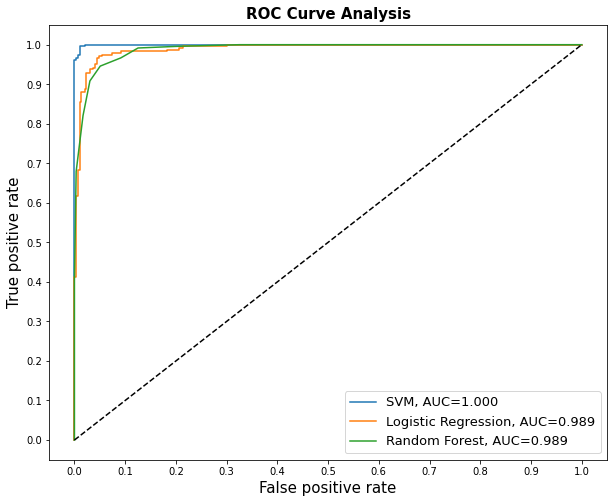

In [61]:
fig = plt.figure(figsize=(10, 8))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False positive rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True positive rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


## Predict new test instance

In [62]:
test = cv2.imread('.\\dataset\\cropped\\Apple_Bad\\Apple_Bad969.png')
test.shape

(157, 160, 3)

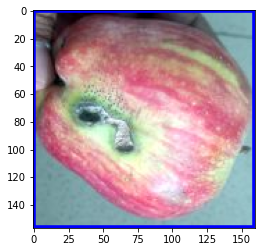

In [63]:
plt.imshow(cv2.cvtColor(test,cv2.COLOR_BGR2RGB))

In [64]:
print(test)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [ 89  87  93]
  ...
  [183 177 134]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [153 150 112]
  ...
  [197 192 147]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


In [65]:
scalled_test_img = cv2.resize(test, (32, 32))
test_har = w2d(test,'db1',5)
scalled_test_har = cv2.resize(test_har, (32, 32))
combined_test_img = np.vstack((scalled_test_img.reshape(32*32*3,1),scalled_test_har.reshape(32*32,1)))

In [66]:
combined_test_img.shape

(4096, 1)

In [67]:
len_image_array=32*32*3 + 32*32

In [68]:
len_image_array

4096

In [69]:
final_image=combined_test_img.reshape(1,len_image_array).astype(float)

In [70]:
prediction=pipe.predict(final_image)[0]      # {'Apple_Bad': 0, 'Apple_Good': 1}

In [71]:
if prediction==0:
    print("Bad")
else:
    print("Good")

Bad


### For ESP32 cam images

In [72]:
import urllib.request

In [73]:
url='http://192.168.186.140/capture'
imgResp = urllib.request.urlopen(url)
# Numpy to convert into a array
imgNp = np.array(bytearray(imgResp.read()),dtype=np.uint8)
# Finally decode the array to OpenCV usable format ;) 
image1 = cv2.imdecode(imgNp,-1)
image1

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
image=cv2.resize(image1,(256,256))
plt.imshow(image)

In [ ]:
new=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(new)

In [ ]:
crop_image=get_cropped_image('.\\test images\\capture.jpg')
oci=cv2.cvtColor(crop_image,cv2.COLOR_BGR2RGB)
plt.imshow(oci)

In [ ]:
scalled_test_img = cv2.resize(oci, (32, 32))
test_har = w2d(oci,'db1',5)
scalled_test_har = cv2.resize(test_har, (32, 32))
combined_test_img = np.vstack((scalled_test_img.reshape(32*32*3,1),scalled_test_har.reshape(32*32,1)))

In [ ]:
plt.imshow(test_har)

In [ ]:
len_image_array=32*32*3 + 32*32
final_image=combined_test_img.reshape(1,len_image_array).astype(float)

In [ ]:
prediction=pipe.predict(final_image)

In [ ]:
prediction

## Save the model

In [ ]:
best_clf=best_estimators['svm']

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

## Using Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
y_new = np.array(y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_new, random_state=0)

In [ ]:
print(X.shape)
print(X[0].shape)

In [ ]:
X_train1[0]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1=scaler.fit_transform(X_train)
X_test1=scaler.fit_transform(X_test)

In [ ]:
X_train1[0]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(4096,),activation="relu"),
    keras.layers.Dense(2,activation='sigmoid'),
   
])

model.compile(optimizer='adam', 
                 loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train1, y_train1, epochs = 5)

In [ ]:
model.evaluate(X_test1, y_test1)

In [ ]:
model.predict(final_image)

In [ ]:
def create_model(optimizer='adam',
                  kernel_initializer='glorot_uniform', 
                  dropout=0.2):
    
    model = keras.Sequential([
        keras.layers.Dense(2,input_shape=(4096,),activation="sigmoid"),
    ])
    
#     model.add(Dense(64,activation='relu',kernel_initializer=kernel_initializer))
#     model.add(Dropout(dropout))
#     model.add(Dense(1,activation='sigmoid',kernel_initializer=kernel_initializer))

    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

    return model

# wrap the model using the function you created
clf = KerasRegressor(build_fn=create_model,verbose=0)

# just create the pipeline
pipeline2 = make_pipeline(StandardScaler(), clf)

pipeline2.fit(X_train1, y_train1)

In [ ]:
ypred22=pipeline2.predict(X_test1)

In [ ]:
y_predicted_labels = [np.argmax(i) for i  in ypred22]
cm = tf.math.confusion_matrix(labels=y_test1, predictions=y_predicted_labels)

In [ ]:
cm

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')